In [20]:
from google.colab import files

uploaded = files.upload()


print(uploaded.keys())

Saving drug_data.csv to drug_data (1).csv
dict_keys(['drug_data (1).csv'])


<ipython-input-21-952d60ccecc5>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Drug', y='Effectiveness', hue='Region', ci=None)


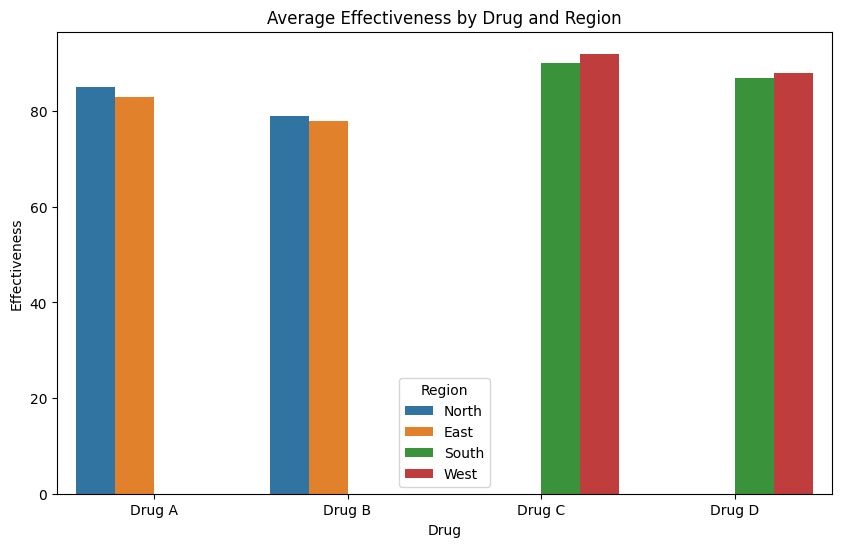

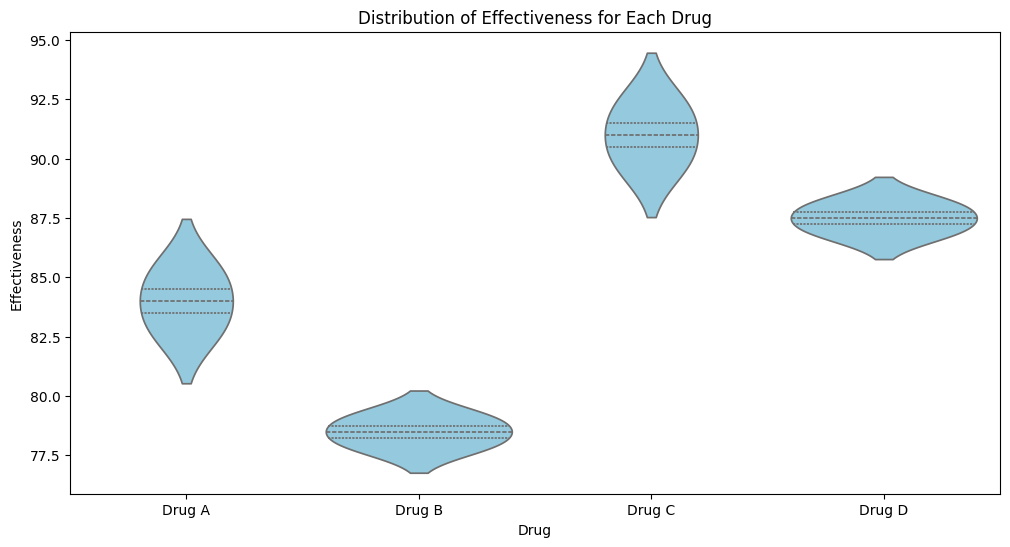

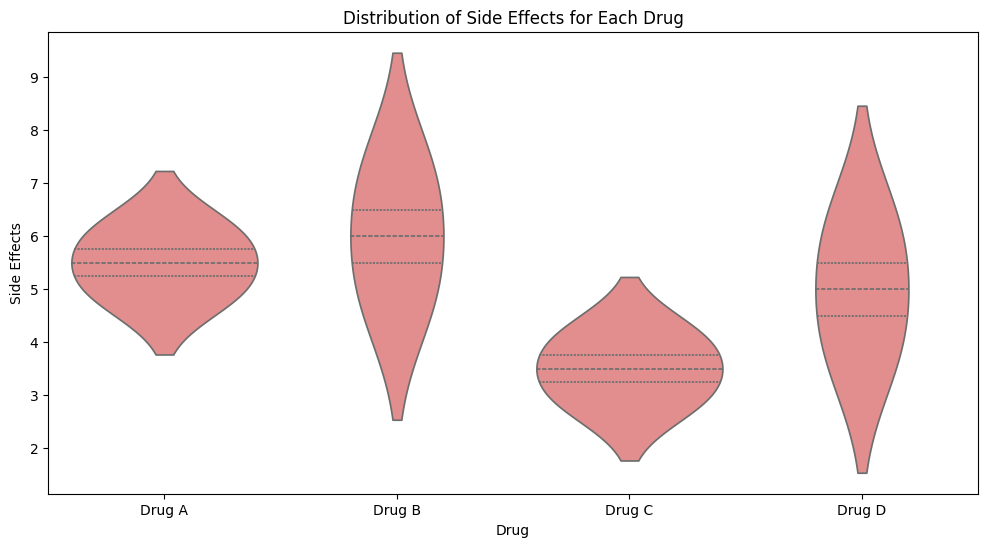

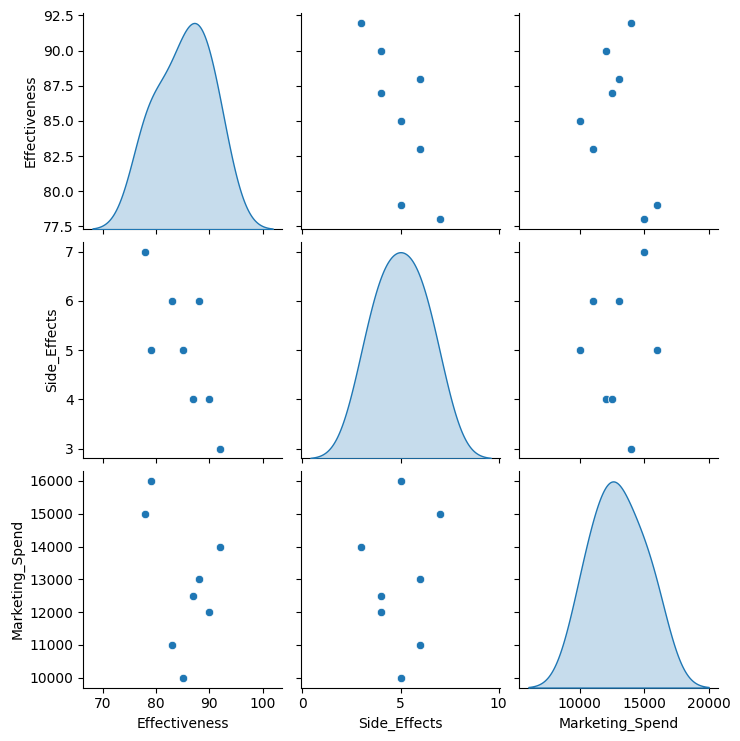

<ipython-input-21-952d60ccecc5>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Trial_Period', y='Effectiveness', palette='coolwarm')


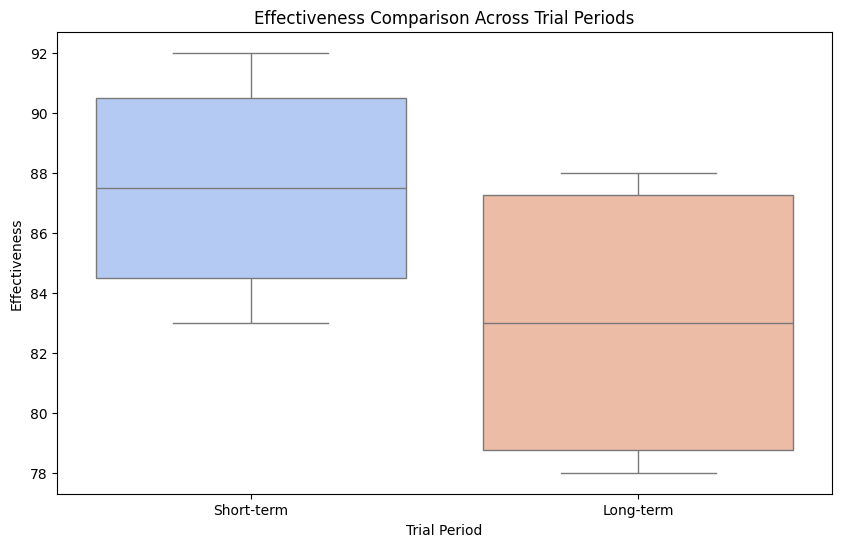

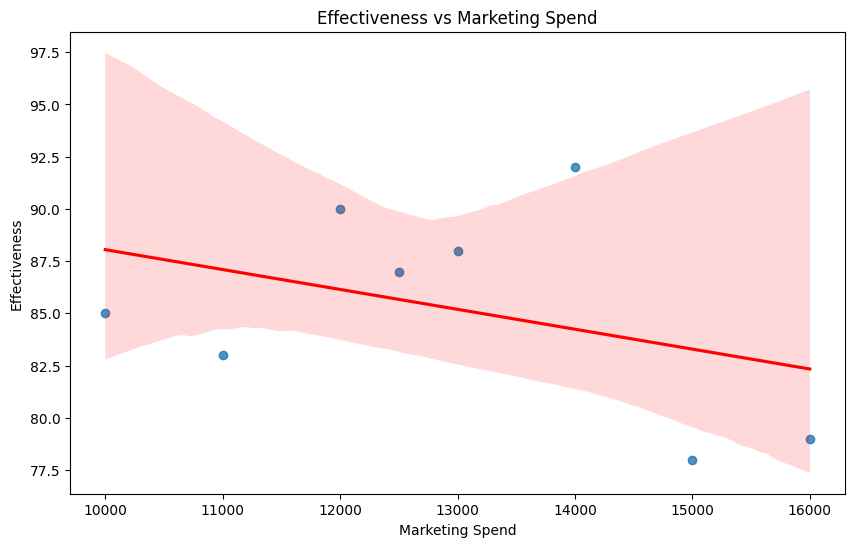

The product with the best overall effectiveness is Drug C with an average effectiveness of 91.00.
The correlation between Effectiveness and Side Effects is -0.74.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('drug_data.csv')  # Replace with your file path

# Data cleaning
df.dropna(inplace=True)  # Drop rows with missing values
df['Effectiveness'] = pd.to_numeric(df['Effectiveness'], errors='coerce')
df['Side_Effects'] = pd.to_numeric(df['Side_Effects'], errors='coerce')

# 1. Bar plot: Average Effectiveness for each drug across regions
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Drug', y='Effectiveness', hue='Region', ci=None)
plt.title('Average Effectiveness by Drug and Region')
plt.ylabel('Effectiveness')
plt.xlabel('Drug')
plt.legend(title='Region')
plt.show()

# 2. Violin plot: Distribution of Effectiveness and Side Effects for each product
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Drug', y='Effectiveness', inner='quartile', color='skyblue')
plt.title('Distribution of Effectiveness for Each Drug')
plt.xlabel('Drug')
plt.ylabel('Effectiveness')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Drug', y='Side_Effects', inner='quartile', color='lightcoral')
plt.title('Distribution of Side Effects for Each Drug')
plt.xlabel('Drug')
plt.ylabel('Side Effects')
plt.show()

# 3. Pairplot: Relationships between Effectiveness, Side Effects, and Marketing Spend
sns.pairplot(df[['Effectiveness', 'Side_Effects', 'Marketing_Spend']], diag_kind='kde')
plt.show()

# 4. Boxplot: Effectiveness for different trial periods
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Trial_Period', y='Effectiveness', palette='coolwarm')
plt.title('Effectiveness Comparison Across Trial Periods')
plt.xlabel('Trial Period')
plt.ylabel('Effectiveness')
plt.show()

# 5. Regression plot: Marketing Spend vs. Effectiveness
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Marketing_Spend', y='Effectiveness', line_kws={"color": "red"})
plt.title('Effectiveness vs Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Effectiveness')
plt.show()

# Analysis
# Product with the best overall effectiveness
best_product = df.groupby('Drug')['Effectiveness'].mean().idxmax()
best_effectiveness = df.groupby('Drug')['Effectiveness'].mean().max()

# Correlation between Effectiveness and Side Effects
correlation = df['Effectiveness'].corr(df['Side_Effects'])

print(f"The product with the best overall effectiveness is {best_product} with an average effectiveness of {best_effectiveness:.2f}.")
print(f"The correlation between Effectiveness and Side Effects is {correlation:.2f}.")
